<a href="https://colab.research.google.com/github/BrendaChepkoech/Monthly-Insurance-Claim-Prediction/blob/main/Monthly_Insurance_Claim_Prediction_Challenge_Zindi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monthly Insurance Claim Prediction Challenge

## 1. Defining the Question

### a) Specifying the Question

The objective of this challenge is to create a machine learning model to predict how much a client will claim from Zimnat per month for a whole year.

### b) Defining the Metric for Success

Create a machine learning model to predict how much a client will claim from Zimnat per month for a whole year.

### c) Understanding the context 

Short-term insurance claims are one of the largest costs in the insurance industry, and are extremely difficult to forecast. Zimnat Insurance wants to predict the value of future claims per client, in order to better forecast annual costs.

### d) Recording the Experimental Design


* Import the relevant libraries that we will use in our analysis.

* Read and explore the dataset we will use for our project.

* Find and deal with outliers, anomalies, and missing data within the dataset.

* Perform univariate and bivariate analysis while recording our observations.

* Implement the solution

* Challenge the solution by giving insights on how we can optimize the models to give us a better performance as compared to the baseline model.

* Provide recommendations based on the whole analysis and modelling techniques used in the project.

### e) Data Relevance

In [ ]:
# We have all the variables that are needed to predict the amount of claims per year
import pandas as pd
data_dict= pd.read_csv('/content/DataDictionary.csv')
data_dict

,Policy Data,Unnamed: 1
0,Columns,Data type
1,policy number,Unique policy identifier
2,product code,product code
3,trans date,date of policy transaction
4,from date,first date of policy cover
5,to date,last date of policy cover
6,agency full name,agency
7,class of business,class of business
8,client type,client type
9,Renewal frequency,policy renewal frequency


## 2. Reading the Data

In [ ]:
# Loading libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# Loading the Dataset
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')
policy=pd.read_csv('/content/policies.csv')
sample_sub= pd.read_csv('/content/SampleSubmission.csv')
data_dict= pd.read_csv('/content/DataDictionary.csv')

## 3. Checking the Data

In [ ]:
# Determining the no. of records in our dataset
#
train.shape

(9376, 15)

In [ ]:
#test shape
test.shape

(4019, 14)

In [ ]:
# Previewing the top of our dataset
#
train.head()

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch,target
0,ID_JZ7QWRHH57RO,pol000009680,claim0011359,300000.0,prod00027,ag00068,cob00031,rt00006,2021-05-13,ct0003,rf0001,pc0007,sc00022,br00006,82150.00
1,ID_KQ5TJMVLJ4EP,pol000006869,claim0005272,16000.0,prod00005,ag00226,cob00010,rt00032,2018-05-13,ct0003,rf0001,pc0007,sc00023,br00002,3780.24
2,ID_NYHI7WJGGIAE,pol000006135,claim0004147,3000.0,prod00029,ag00037,cob00010,rt00026,2018-08-18,ct0003,rf0001,pc0007,sc00024,br00002,2196.50
3,ID_ROMMDCXYUXN5,pol000008991,claim0009962,6000.0,prod00005,ag00037,cob00009,rt00032,2018-12-20,ct0003,rf0001,pc0007,sc00021,br00001,105.67
4,ID_2OTD9NX8L73D,pol000007768,claim0007346,26850.0,prod00015,ag00226,cob00034,rt00023,2018-11-07,ct0001,rf0001,pc0007,sc00021,br00001,1605.64


In [ ]:
# Previewing the bottom of our dataset
# 
train.tail()

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch,target
9371,ID_A5ETUPPQDFLS,pol000006054,claim0003743,42000.0,prod00015,ag00037,cob00034,rt00023,2019-09-02,ct0001,rf0002,pc0007,sc00021,br00002,205.68
9372,ID_Z3OGUWI7T2GC,pol000006715,claim0005088,6800.0,prod00005,ag00064,cob00009,rt00032,2018-05-12,ct0003,rf0002,pc0007,sc00021,br00002,1133.32
9373,ID_GSJDAJCABSBZ,pol000008236,claim0008976,5000.0,prod00005,ag00064,cob00009,rt00032,2018-07-28,ct0003,rf0001,pc0007,sc00029,br00001,2176.00
9374,ID_8B7YNBEKXHJW,pol000006847,claim0005250,6000.0,prod00005,ag00037,cob00009,rt00032,2018-08-16,ct0003,rf0001,pc0007,sc00022,br00002,851.40
9375,ID_8OB2QWUC664M,pol000007450,claim0006249,10000.0,prod00027,ag00226,cob00010,rt00006,2019-09-07,ct0003,rf0002,pc0007,sc00023,br00001,1410.00


In [ ]:
# Checking whether each column has an appropriate datatype
#
train.dtypes

claim_id              object
policy_number         object
claim_number          object
sum_insured          float64
product               object
agent                 object
class_of_business     object
risk_type             object
loss_date             object
client_type           object
renewal_frequency     object
primary_cause         object
secondary_cause       object
branch                object
target               float64
dtype: object

## 5. Tidying the Dataset

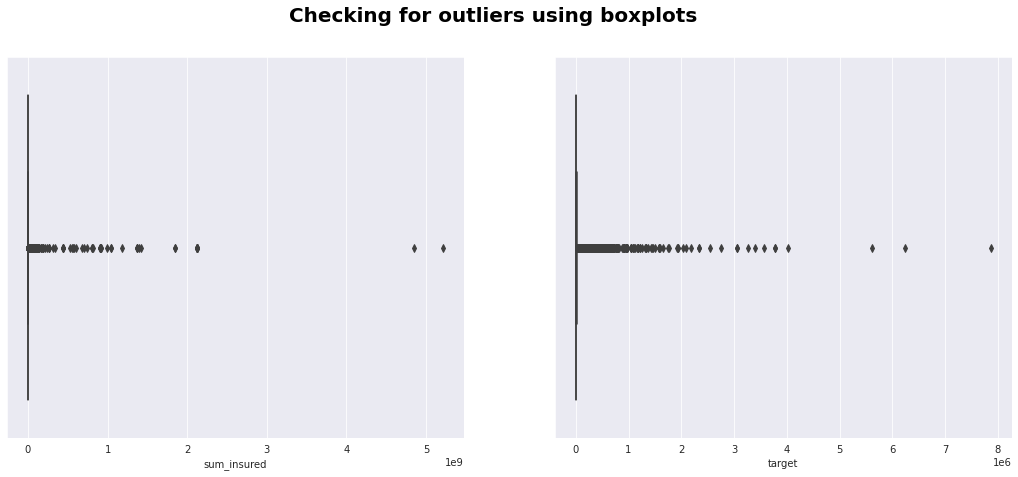

In [ ]:
# Checking for Outliers
#
col_names = ['sum_insured', 'target']


fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(18,7))
plt.suptitle('Checking for outliers using boxplots',fontsize=20,weight='bold',color='black')
for ax, data, column in zip(axes.flatten(),train,col_names):
  sns.boxplot(train[column],ax=ax)
  
  

We have outliers in our dataset but we shall normalize our dataset so as to reduce the variance between the values.

In [ ]:
# Checking for Anomalies
#

In [ ]:
# Identifying the Missing Data
#
train.isnull().sum()

claim_id              0
policy_number        86
claim_number          0
sum_insured           0
product               0
agent                 0
class_of_business     0
risk_type             0
loss_date             0
client_type           0
renewal_frequency     0
primary_cause         0
secondary_cause       0
branch                0
target                0
dtype: int64

In [ ]:
# Identifying the Missing Data as a percentage of the main dataset
#
(train.isnull().sum()/train.shape[0])*100

claim_id             0.000000
policy_number        0.917235
claim_number         0.000000
sum_insured          0.000000
product              0.000000
agent                0.000000
class_of_business    0.000000
risk_type            0.000000
loss_date            0.000000
client_type          0.000000
renewal_frequency    0.000000
primary_cause        0.000000
secondary_cause      0.000000
branch               0.000000
target               0.000000
dtype: float64

In [ ]:
# Dealing with the Missing Data
#Since most of our missing values are categorical we shall fill missing values using mode

train['policy_number'] = train['policy_number'].fillna(train['policy_number'].mode()[0])
#confirming if there are null values
train.isnull().sum()

claim_id             0
policy_number        0
claim_number         0
sum_insured          0
product              0
agent                0
class_of_business    0
risk_type            0
loss_date            0
client_type          0
renewal_frequency    0
primary_cause        0
secondary_cause      0
branch               0
target               0
dtype: int64

In [ ]:
# Dealing with the Missing Data
#Since most of our missing values are categorical we shall fill missing values using mode

test['policy_number'] = test['policy_number'].fillna(test['policy_number'].mode()[0])
#confirming if there are null values
test.isnull().sum()

claim_id             0
policy_number        0
claim_number         0
sum_insured          0
product              0
agent                0
class_of_business    0
risk_type            0
loss_date            0
client_type          0
renewal_frequency    0
primary_cause        0
secondary_cause      0
branch               0
dtype: int64

In [ ]:
#Checking for duplicates
train.duplicated().sum()

0

In [ ]:
# More data cleaning procedures
#Changing data types on train column
train['loss_date'] = pd.to_datetime(train['loss_date'])
train.dtypes

claim_id                     object
policy_number                object
claim_number                 object
sum_insured                 float64
product                      object
agent                        object
class_of_business            object
risk_type                    object
loss_date            datetime64[ns]
client_type                  object
renewal_frequency            object
primary_cause                object
secondary_cause              object
branch                       object
target                      float64
dtype: object

In [ ]:
#Changing data types on test column
test['loss_date'] = pd.to_datetime(test['loss_date'])
test.dtypes

claim_id                     object
policy_number                object
claim_number                 object
sum_insured                 float64
product                      object
agent                        object
class_of_business            object
risk_type                    object
loss_date            datetime64[ns]
client_type                  object
renewal_frequency            object
primary_cause                object
secondary_cause              object
branch                       object
dtype: object

## 6. Exploratory Analysis

In [ ]:
num_cols=train[['sum_insured', 'target']]

In [ ]:
num_cols.describe()

,sum_insured,target
count,9.376000e+03,9.376000e+03
mean,8.534790e+06,4.146471e+04
std,1.125565e+08,2.084347e+05
min,0.000000e+00,0.000000e+00
25%,6.500000e+03,2.879250e+02
50%,5.054200e+04,1.956925e+03
75%,4.200000e+05,1.270064e+04
max,5.211868e+09,7.868591e+06


In [ ]:
num_cols.kurt()

sum_insured    991.394908
target         435.967074
dtype: float64

In [ ]:
num_cols.skew()

sum_insured    27.531764
target         17.015541
dtype: float64

Both target and sum insured are positively skewed

In [ ]:
train.columns

Index(['claim_id', 'policy_number', 'claim_number', 'sum_insured', 'product',
       'agent', 'class_of_business', 'risk_type', 'loss_date', 'client_type',
       'renewal_frequency', 'primary_cause', 'secondary_cause', 'branch',
       'target'],
      dtype='object')

In [ ]:
# Convert categorical variables to categorical objects
cat_cols = train.columns.difference(['claim_id', 'loss_date', 'sum_insured', 'target']).astype("category")

# Preview categorical variables
train[cat_cols].head()

,agent,branch,claim_number,class_of_business,client_type,policy_number,primary_cause,product,renewal_frequency,risk_type,secondary_cause
0,ag00068,br00006,claim0011359,cob00031,ct0003,pol000009680,pc0007,prod00027,rf0001,rt00006,sc00022
1,ag00226,br00002,claim0005272,cob00010,ct0003,pol000006869,pc0007,prod00005,rf0001,rt00032,sc00023
2,ag00037,br00002,claim0004147,cob00010,ct0003,pol000006135,pc0007,prod00029,rf0001,rt00026,sc00024
3,ag00037,br00001,claim0009962,cob00009,ct0003,pol000008991,pc0007,prod00005,rf0001,rt00032,sc00021
4,ag00226,br00001,claim0007346,cob00034,ct0001,pol000007768,pc0007,prod00015,rf0001,rt00023,sc00021


In [ ]:
# Fill in missing values in categorical variables with the most common
#train[cat_cols] = train[cat_cols].apply(lambda x: x.fillna(x.value_counts().index[0]))

# Convert
for col in cat_cols:
  train[col] = train[col].astype('category')

# Confirm
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9376 entries, 0 to 9375
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   claim_id           9376 non-null   object        
 1   policy_number      9376 non-null   category      
 2   claim_number       9376 non-null   category      
 3   sum_insured        9376 non-null   float64       
 4   product            9376 non-null   category      
 5   agent              9376 non-null   category      
 6   class_of_business  9376 non-null   category      
 7   risk_type          9376 non-null   category      
 8   loss_date          9376 non-null   datetime64[ns]
 9   client_type        9376 non-null   category      
 10  renewal_frequency  9376 non-null   category      
 11  primary_cause      9376 non-null   category      
 12  secondary_cause    9376 non-null   category      
 13  branch             9376 non-null   category      
 14  target  

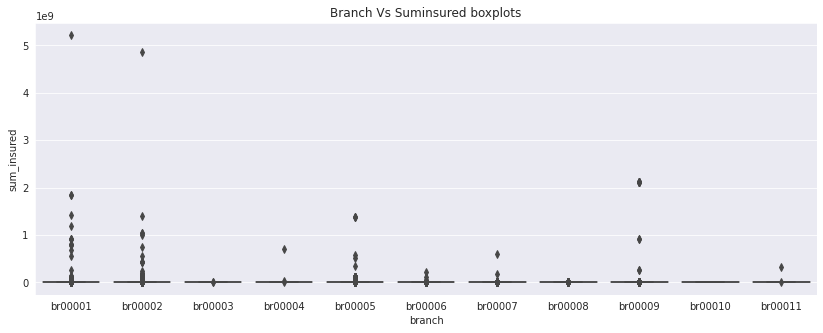

In [ ]:
# Ploting the univariate summaries and recording our observations
#
plt.figure(figsize = (14, 5))
sns.boxplot(x = 'branch', y = 'sum_insured', data = train)
plt.title('Branch Vs Suminsured boxplots')
plt.show()

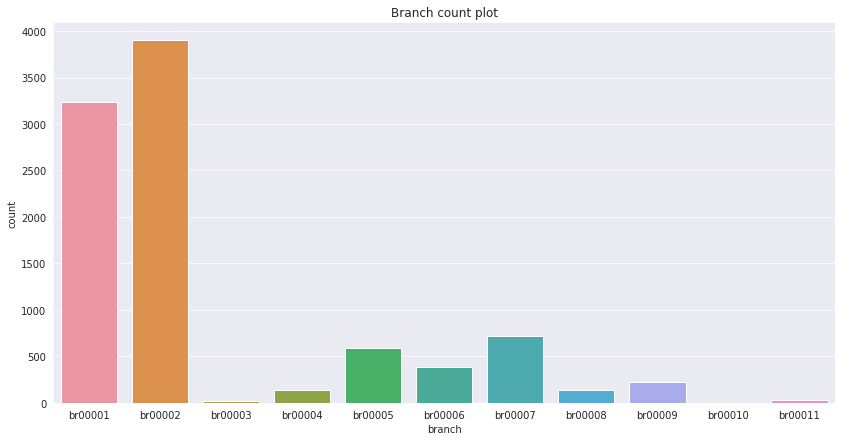

In [ ]:
# Branch countplot
plt.figure(figsize = (14, 7))
sns.countplot(x = 'branch', data = train)
plt.title('Branch count plot')
plt.show()

In [ ]:
train.columns

Index(['claim_id', 'policy_number', 'claim_number', 'sum_insured', 'product',
       'agent', 'class_of_business', 'risk_type', 'loss_date', 'client_type',
       'renewal_frequency', 'primary_cause', 'secondary_cause', 'branch',
       'target'],
      dtype='object')

## Feature Enginearing

In [ ]:
# Label Encoding our categorical variables
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
train[cat_cols] = train[cat_cols].apply(en.fit_transform)

train.head()

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch,target
0,ID_JZ7QWRHH57RO,3070,7439,300000.0,26,4,30,5,2021-05-13,2,0,6,20,5,82150.00
1,ID_KQ5TJMVLJ4EP,1126,3469,16000.0,4,7,9,31,2018-05-13,2,0,6,21,1,3780.24
2,ID_NYHI7WJGGIAE,630,2799,3000.0,28,1,9,25,2018-08-18,2,0,6,22,1,2196.50
3,ID_ROMMDCXYUXN5,2546,6448,6000.0,4,1,8,31,2018-12-20,2,0,6,19,0,105.67
4,ID_2OTD9NX8L73D,1767,4832,26850.0,14,7,32,22,2018-11-07,0,0,6,19,0,1605.64


In [ ]:
# Splitting the loss date column to day, month and year
# day
train['loss_date_day'] = train.loss_date.dt.day

# month
train['loss_date_month'] = train.loss_date.dt.month
 
# year
train['loss_date_year'] = train.loss_date.dt.year

train.drop('loss_date', axis = 1, inplace=True)

[0.07209377 0.0968827  0.16216472 0.02148999 0.05009755 0.02509857
 0.0311859  0.00453711 0.0579958  0.02635708 0.12816273 0.01417964
 0.12334062 0.10471967 0.08169416]


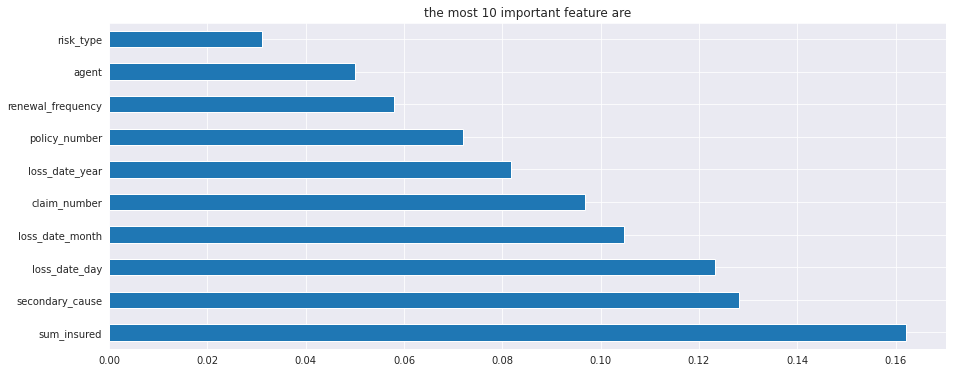

In [ ]:
# Feature Selection
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

X = train.drop(['target', 'claim_id'], axis=1)
y = train['target']

from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X, y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('the most 10 important feature are')
plt.show()

## 7. Implementing the Solution

In [ ]:
#Train test split
feat_imp = train[['sum_insured', 'loss_date_day', 'secondary_cause', 'loss_date_month','claim_number','loss_date_year','policy_number','renewal_frequency','agent', 'primary_cause']]

X = feat_imp
y = train['target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=23)

Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
forest = RandomForestRegressor()

reg = RandomForestRegressor(max_depth=10,max_features='auto'
        ,min_samples_leaf=1,min_samples_split=2,bootstrap=True,random_state=23)

reg.fit(X_train, y_train)

# Predicting 
y_pred = reg.predict(X_test)

In [ ]:
# Evaluating our model

print(f'Linear Regression MAE score on the X_test is: {mean_absolute_error(y_test, y_pred)}')

Linear Regression MAE score on the X_test is: 45369.896926710586


## Processing the test file

In [ ]:
# Splitting the loss date column to day, month and year
# day
test['loss_date_day'] = test.loss_date.dt.day

# month
test['loss_date_month'] = test.loss_date.dt.month
 
# year
test['loss_date_year'] = test.loss_date.dt.year

test.drop('loss_date', axis = 1, inplace=True)

In [ ]:
# Label Encoding 
test[cat_cols] = test[cat_cols].apply(en.fit_transform)

test.head()

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,client_type,renewal_frequency,primary_cause,secondary_cause,branch,loss_date_day,loss_date_month,loss_date_year
0,ID_4RO0KZI9BBW2,739,1667,300000.0,4,4,8,29,2,0,6,26,3,11,3,2021
1,ID_GTE9ZUJ9GZ97,312,883,2700000.0,12,3,28,20,0,2,6,20,1,25,6,2020
2,ID_RUVIYRKWZ4RG,917,1895,4071352.0,10,0,14,14,0,0,9,43,0,14,3,2019
3,ID_J81X8SWU6JYN,2081,3852,0.0,1,1,1,1,0,1,1,10,4,4,12,2018
4,ID_94NM3JJAWWOQ,257,507,1607178.0,12,1,28,20,0,2,6,20,1,18,9,2019


In [ ]:
main_cols = ['sum_insured', 'loss_date_day', 'secondary_cause', 'loss_date_month','claim_number','loss_date_year','policy_number','renewal_frequency','agent', 'primary_cause']
# Make prediction on the test set
test = test[main_cols]
predictions = reg.predict(test)



# # Create a submission file
sub_file = sample_sub.copy()
sub_file.target = predictions



In [ ]:
sub_file.to_csv('submission.csv', index=False)

In [ ]:
sub_file.head()

,claim_id,target
0,ID_4RO0KZI9BBW2,129736.776856
1,ID_GTE9ZUJ9GZ97,128791.852124
2,ID_RUVIYRKWZ4RG,142956.588308
3,ID_J81X8SWU6JYN,575.345396
4,ID_94NM3JJAWWOQ,23576.489025


## MLP Regressor

In [ ]:
##Import Neural Network model
#from sklearn.neural_network import MLPRegressor
#Using the classifier along with grid search:
#mlp=MLPRegressor()
#Optimaztion 
#param_grid = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,1), (50,50), (10,10)],
#          'activation': ['relu','tanh','logistic', 'identity'],
#          'alpha': [0.0001, 0.05],
#          'learning_rate': ['constant','adaptive'],
#         'solver': ['adam', 'sgd', 'lbfgs']}
        
       
#Creating grid search using 5-fold cross validation:
#clf = GridSearchCV(mlp, param_grid = param_grid, cv= 5, verbose = 0, scoring = 'neg_mean_squared_error' )

#Fitting the grid search:
#clf.fit(X_train, y_train)

#Get best parameter
#clf.best_params_

In [ ]:
from sklearn.neural_network import MLPRegressor
#Using the classifier along with grid search:
mlp=MLPRegressor(hidden_layer_sizes=(20,20,20),activation='relu',alpha=0.0001,learning_rate='constant',solver='lbfgs',random_state=23)
#Fit model 
mlp.fit(X_train,y_train)
#Prediting with trained model
y_pred = mlp.predict(X_test)

In [ ]:
# Evaluating our model

print(f'MLPRegressor MAE score on the X_test is: {mean_absolute_error(y_test, y_pred)}')

MLPRegressor MAE score on the X_test is: 42076.06673366995


In [ ]:
main_cols = ['sum_insured', 'loss_date_day', 'secondary_cause', 'loss_date_month','claim_number','loss_date_year','policy_number','renewal_frequency','agent', 'primary_cause']
# Make prediction on the test set
test = test[main_cols]
predictions = mlp.predict(test)

# # Create a submission file
sub_file = sample_sub.copy()
sub_file.target = predictions

In [ ]:
sub_file.to_csv('submission1.csv', index=False)

## Neural Networks

In [ ]:
#Train test split
feat_imp = train[['sum_insured', 'loss_date_day', 'secondary_cause', 'loss_date_month','claim_number','loss_date_year','policy_number','renewal_frequency','agent', 'primary_cause']]

X = feat_imp
#X = train.drop(['target', 'claim_id'], axis=1)
y = train['target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=23)

In [ ]:
import tensorflow as tf
print(tf.__version__)
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

2.8.0


In [ ]:
# Import the GridSearchCV class
#from sklearn.model_selection import GridSearchCV
#from tensorflow.keras.optimizers import RMSprop

# 1. Define the model's architecture
#model = Sequential()
# find the number of input features
#n_features = X.shape[1]
#model.add(Dense(10, activation='relu', input_shape=(n_features,)))
#model.add(Dense(8, activation='relu'))
#model.add(Dense(1))
#optimizer = RMSprop(0.1)    # 0.1 is the learning rate
#model.compile(loss='mae',optimizer=optimizer)    # compile the model

# 2. Define the hyperparameters grid to be validated
#batch_size = [10, 20, 40, 60, 80, 100]
#epochs = [10, 50, 100]
#param_grid = dict(batch_size=batch_size, epochs=epochs)
#grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='mae', n_jobs=-1)

# 3. Run the GridSearchCV process
#grid_result = grid.fit(X_train, y_train)

# 4. Print the results of the best model
#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
tf.random.set_seed(42)

model =Sequential([
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

model.compile(
    loss='mae',
    optimizer=Adam(),
    metrics=['mae']
)

model.fit(X_train, y_train, epochs=100)

Epoch 1/50
206/206 [==============================] - 1s 3ms/step - loss: 228540.5312 - mae: 228540.5312
Epoch 2/50
206/206 [==============================] - 1s 3ms/step - loss: 113027.7734 - mae: 113027.7734
Epoch 3/50
206/206 [==============================] - 1s 5ms/step - loss: 56258.8711 - mae: 56258.8711
Epoch 4/50
206/206 [==============================] - 1s 5ms/step - loss: 56100.2773 - mae: 56100.2773
Epoch 5/50
206/206 [==============================] - 1s 5ms/step - loss: 55525.5430 - mae: 55525.5430
Epoch 6/50
206/206 [==============================] - 1s 5ms/step - loss: 45617.4570 - mae: 45617.4570
Epoch 7/50
206/206 [==============================] - 1s 5ms/step - loss: 44283.4219 - mae: 44283.4219
Epoch 8/50
206/206 [==============================] - 1s 5ms/step - loss: 41689.1914 - mae: 41689.1914
Epoch 9/50
206/206 [==============================] - 1s 5ms/step - loss: 43434.9883 - mae: 43434.9883
Epoch 10/50
206/206 [==============================] - 1s 6ms/step - 

In [ ]:
preds = model.predict(X_test)

# Evaluating our model

print(f'Neural net regressor MAE score on the X_test is: {mean_absolute_error(y_test, preds)}')

Neural net regressor MAE score on the X_test is: 40013.032925865424


In [ ]:
main_cols = ['sum_insured', 'loss_date_day', 'secondary_cause', 'loss_date_month','claim_number','loss_date_year','policy_number','renewal_frequency','agent', 'primary_cause']
# Make prediction on the test set
test = test[main_cols]
predictions = model.predict(test)

# # Create a submission file
sub_file = sample_sub.copy()
sub_file.target = predictions

In [ ]:
sub_file.to_csv('submission1.csv', index=False)

## XGoost

In [ ]:
#IMport XGboost model 
from xgboost import XGBRegressor

my_model = XGBRegressor()
#Fit model 
my_model.fit(X_train, y_train, verbose=False)

#Predict using trained model 
y_pred = my_model.predict(X_test)

[12:20:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# Evaluating our model

print(f'XG Boost  MAE score on the X_test is: {mean_absolute_error(y_test, y_pred)}')

XG Boost  MAE score on the X_test is: 47367.087709734085


## LGBM

In [ ]:
import lightgbm as lgb
# we use this params to create a new LGBM Regressor
model = lgb.LGBMRegressor(random_state=23)
#Fit model 
model.fit(X_train, y_train, verbose=False)

#Predict using trained model 
y_preds = my_model.predict(X_test)

In [ ]:
# Evaluating our model

print(f'LGBM MAE score on the X_test is: {mean_absolute_error(y_test, y_preds)}')

LGBM MAE score on the X_test is: 47367.087709734085


## CATBOOST

In [ ]:
# importing the catboost regressor

from catboost import CatBoostRegressor

cat = CatBoostRegressor(random_state=42, verbose=0)
cat.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = cat.predict(X_test)

In [ ]:
# Evaluating our model

print(f'LGBM MAE score on the X_test is: {mean_absolute_error(y_test, y_preds)}')

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution 
#